**CA2**

**Submitted by**

Bhupinder Singh (ID: 10634583)

Jaswanth Reddy Mali (ID: 10638130)

Linga Reddy Mamidi (ID: 10635793)

The process starts with importing necessary packages.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import time


The following code installs h2o.

In [ ]:
pip install h2o

The following code reads the csv file. The file has to be uploaded on google colab every time. Otherwise, the upcoming codes will not work. **The dataset has been upsampled from rapidminer so that imbalance of the class can be removed. **

In [ ]:
data = pd.read_csv("/content/diabetes.csv", sep=';')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The following code checks whether the data is balanced or not. We know that the upsampling brings balance in the dataset outcome, but still for confirmation, we used the following code.

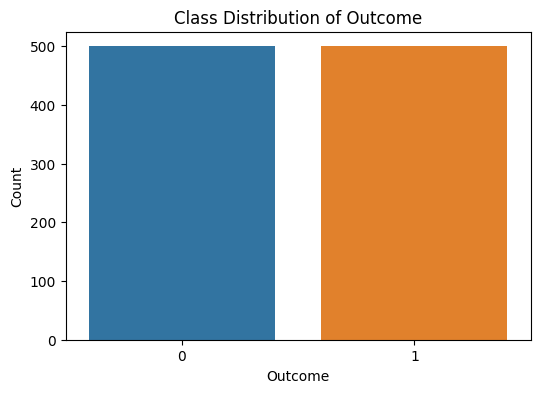

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution of Outcome')
plt.show()


Since data is imbalanced, we need to first preprocess the data and then balance it for logistic regression and GLM model.

The following code lists the missing values in data in the form of percentage.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing)

                          Total  Percent
Pregnancies                   0      0.0
Glucose                       0      0.0
BloodPressure                 0      0.0
SkinThickness                 0      0.0
Insulin                       0      0.0
BMI                           0      0.0
DiabetesPedigreeFunction      0      0.0
Age                           0      0.0
Outcome                       0      0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


In [ ]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6      148             72             35        0  33.600000   
1              1       85             66             29        0  26.600000   
2              8      183             64              0        0  23.300000   
3              1       89             66             23       94  28.100000   
4              0      137             40             35      168  43.100000   
..           ...      ...            ...            ...      ...        ...   
995            7      159             91              0        0  30.572934   
996            3      170             74             13      105  30.326860   
997           12       88             74             28      150  32.338443   
998            4      185             85             27      157  43.592016   
999            3      169             64             36      229  32.757281   

     DiabetesPedigreeFunction  Age  Outcome  
0    

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.146000,126.171000,69.391000,20.597000,83.179000,32.539286,0.481056,34.339000,0.50000
std,3.474875,32.331116,19.598373,16.165764,118.235767,7.569583,0.327038,11.783672,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,103.000000,64.000000,0.000000,0.000000,28.000000,0.254000,25.000000,0.00000
50%,3.000000,122.000000,72.000000,23.500000,33.500000,32.751899,0.389000,31.000000,0.50000
75%,6.250000,148.000000,80.000000,33.000000,135.000000,36.800000,0.643309,42.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.00000


The following code tests the correlations between variables. The Glucose is strongly correlated with Outcome and other variables have weak correlations. But, we have taken all of the variables to take into account all health parameters in order to develop a model

<ipython-input-10-5211eaab9020>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

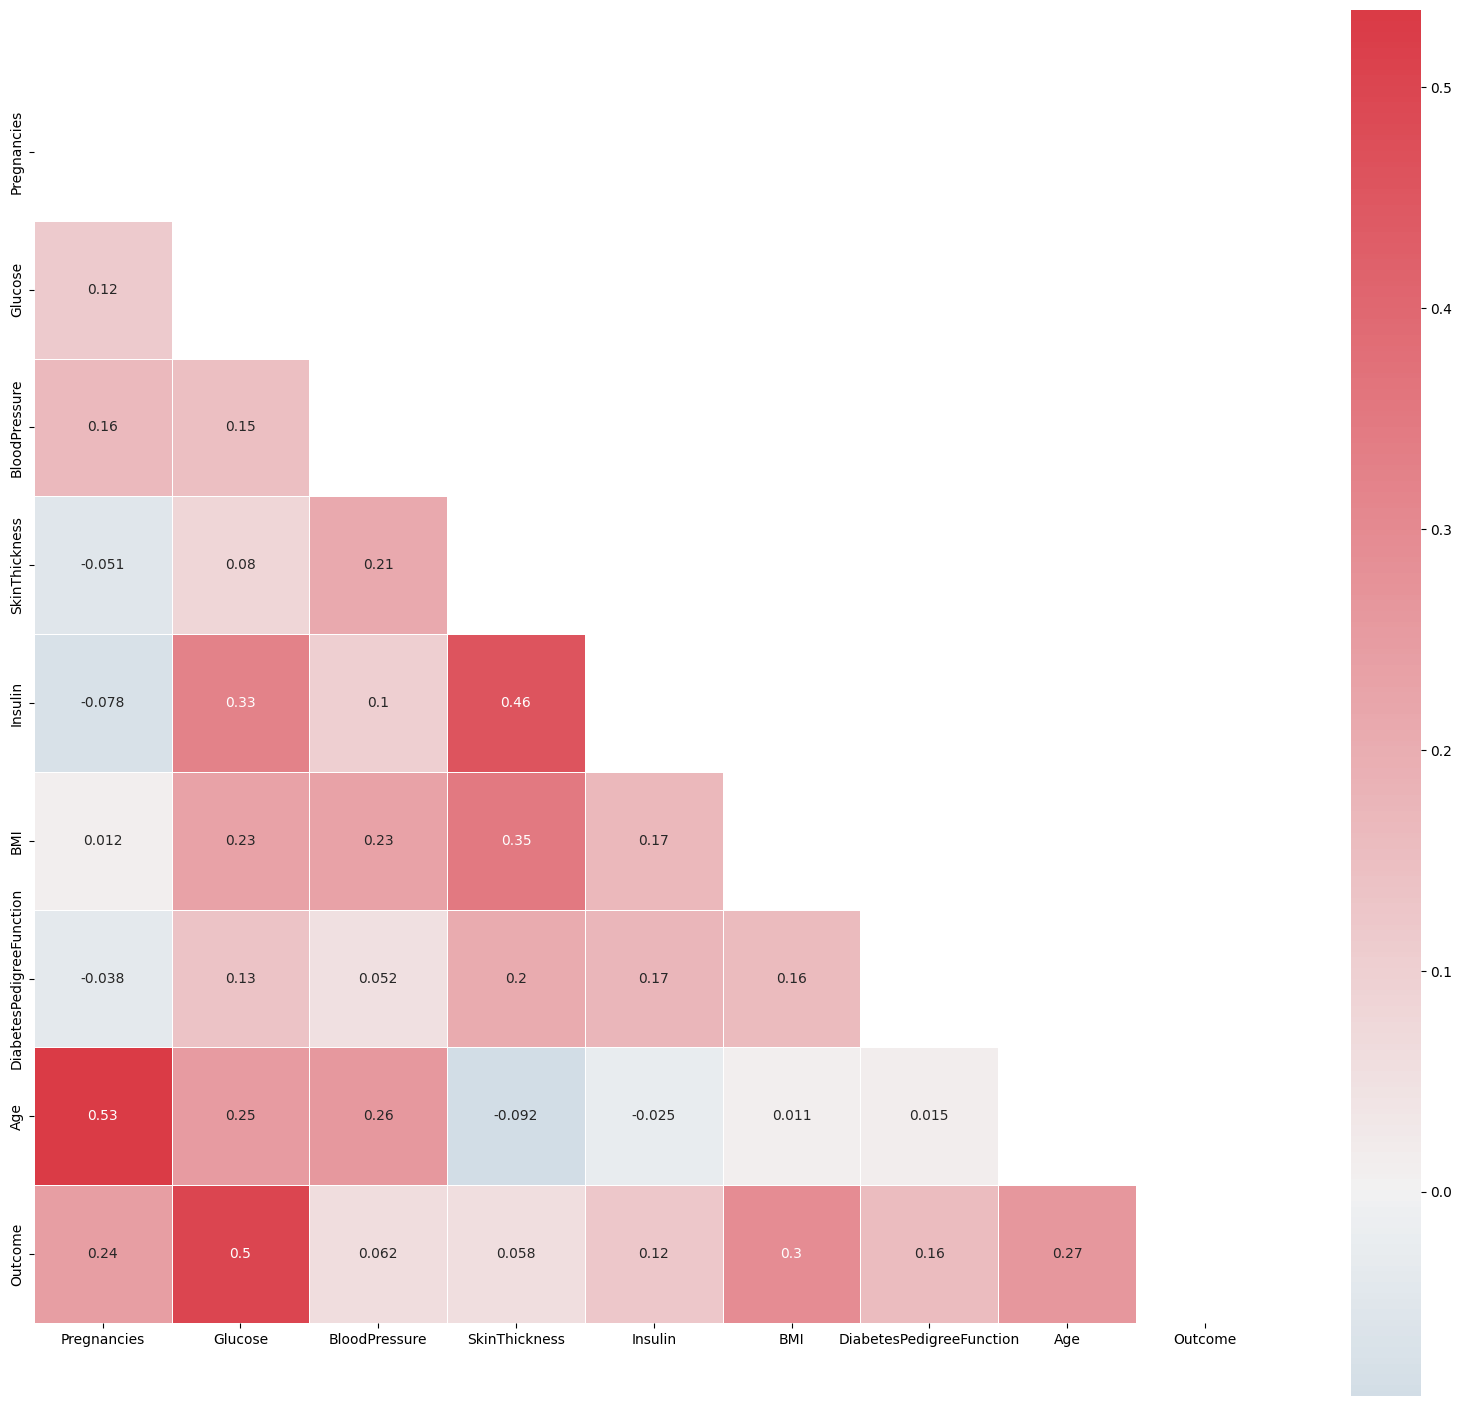

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [ ]:
X = data.drop("Outcome", axis = "columns")

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = data[["Outcome"]]

In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


The code splits data into test and train dataset to be used for GLM and logistic regression.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
train_data = pd.concat([X_train,y_train], axis = 1)


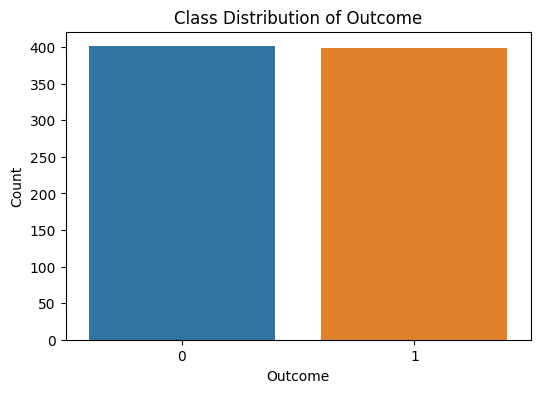

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=y_train, x='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution of Outcome')
plt.show()

The following model named run_model() is set up so that it can be applied to GLM and logistic regression model. It calculates AUC score, time taken and lists feature importance.

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test):
    t0=time.time()
    train_data = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
    test_data = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))
    response_column_name = "Outcome"
    predictors = train_data.columns
    predictors.remove(response_column_name)
    model.train(x = predictors, y = response_column_name, training_frame=train_data)
    performance = model.model_performance(test_data)
    roc_auc = performance.auc()
    time_taken = time.time()-t0
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    feature_importance = model.varimp(use_pandas=True)
    print("Feature Importance:")
    print(feature_importance)
    return model, roc_auc, time_taken

The following code instantiates the H2O server so that models can be applied on to the data.

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpiwbdciza
  JVM stdout: /tmp/tmpiwbdciza/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpiwbdciza/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_ew4jtk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


The following model applies GLM model and calculates time taken and ROC_AUC score. The roc_auc parameter typically refers to the area under the Receiver Operating Characteristic (ROC) curve (AUC).

AUC = 1: Perfect classifier that can distinguish between both outcomes perfectly.
AUC > 0.5 and < 1: Classifier performs better than random guessing, with higher values indicating better performance.
AUC = 0.5: Classifier performs no better than random guessing.
AUC < 0.5: Classifier performs worse than random guessing and is likely to be making incorrect predictions.

In [ ]:

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_model')
glm_model, roc_auc_glm, tt_glm = run_model(glm_model,X_train, y_train, X_test, y_test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.8373837383738374
Time taken = 2.859504461288452
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose             1.329309           1.000000   
1                       BMI             0.616223           0.463567   
2               Pregnancies             0.480971           0.361821   
3             BloodPressure             0.292301           0.219890   
4                       Age             0.260468           0.195943   
5  DiabetesPedigreeFunction             0.219561           0.165170   
6                   Insulin             0.205210           0.154374   
7             SkinThickness             0.000000           0.000000   

   percentage  
0    0.390509  
1    0.181027  
2    0.141294  
3    0.085869  
4    0.076517  
5    0.064500  
6    0.060284  
7    0.000000  


The following code computes ROC_AUC score and time taken for logistic regression.

In [ ]:

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
lr_model = H2OGeneralizedLinearEstimator(family='binomial',model_id='logistic_regression_model')
lr_model, roc_auc_lr, tt_lr = run_model(lr_model,X_train, y_train, X_test, y_test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.8373837383738374
Time taken = 1.0995078086853027
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose             1.329309           1.000000   
1                       BMI             0.616223           0.463567   
2               Pregnancies             0.480971           0.361821   
3             BloodPressure             0.292301           0.219890   
4                       Age             0.260468           0.195943   
5  DiabetesPedigreeFunction             0.219561           0.165170   
6                   Insulin             0.205210           0.154374   
7             SkinThickness             0.000000           0.000000   

   percentage  
0    0.390509  
1    0.181027  
2    0.141294  
3    0.085869  
4    0.076517  
5    0.064500  
6    0.060284  
7    0.000000  


The following code prepaares the data for XGB model

In [ ]:

data = h2o.H2OFrame(data)
data["Outcome"] = data["Outcome"].asfactor()
predictors = data.columns
response = "Outcome"

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


The following model is to applied to XGB model.

In [ ]:
def run_model2(model, data):
    t0=time.time()
    train, valid = data.split_frame(ratios=[.8], seed=1234)
    predictors = data.columns
    response = "Outcome"
    model.train(x = predictors, y = response, training_frame=train, validation_frame=valid)
    performance = model.model_performance()
    roc_auc = performance.auc()
    time_taken = time.time()-t0
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    feature_importance = model.varimp(use_pandas=True)
    print("Feature Importance:")
    print(feature_importance)
    return model, roc_auc, time_taken

The following code evaluates the results of XGB model

In [ ]:

from h2o.estimators import H2OXGBoostEstimator
xgb_model = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)
xgb_model, roc_auc_xgb, tt_xgb = run_model2(xgb_model,data)


xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 1.0
Time taken = 7.229818820953369
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose           649.136353           1.000000   
1                       BMI           331.318695           0.510399   
2                       Age           228.876602           0.352586   
3  DiabetesPedigreeFunction           225.145798           0.346839   
4               Pregnancies           120.946007           0.186318   
5             BloodPressure           118.771286           0.182968   
6             SkinThickness           114.366684           0.176183   
7                   Insulin           102.934311           0.158571   

   percentage  
0    0.343187  
1    0.175162  
2    0.121003  
3    0.119031  
4    0.063942  
5    0.062792  
6    0.060464  
7    0.054420  


The following code defines a model for Navies Bayes classifier

In [ ]:
def run_model3(model, data):
    t0=time.time()
    predictors = data.columns
    response = "Outcome"
    predictors.remove(response)
    model.train(x = predictors, y = response, training_frame=data)
    performance = model.model_performance()
    roc_auc = performance.auc()
    time_taken = time.time()-t0
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    feature_importance = model.varimp(use_pandas=True)
    print("Feature Importance:")
    print(feature_importance)
    return model, roc_auc, time_taken

The following code computes the results of NB classifier

In [ ]:

from h2o.estimators import H2ONaiveBayesEstimator
NB_model = H2ONaiveBayesEstimator(laplace=0,
                                 nfolds=5,
                                 seed=1234)
NB_model, roc_auc_NB, tt_NB = run_model3(NB_model,data)


naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.8278540000000001
Time taken = 1.1571674346923828
Feature Importance:
None


The following codes measures parameters for distributed random forest estimator

In [ ]:
data["Outcome"] = data["Outcome"].asfactor()
predictors = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
response = "Outcome"

In [ ]:
def run_model4(model, predictors, response, data):
    t0=time.time()
    train, valid = data.split_frame(ratios=[.8], seed=1234)
    model.train(x=predictors,
               y=response,
               training_frame=train,
               validation_frame=valid)
    performance = model.model_performance()
    roc_auc = performance.auc()
    time_taken = time.time()-t0
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    feature_importance = model.varimp(use_pandas=True)
    print("Feature Importance:")
    print(feature_importance)
    return model, roc_auc, time_taken

In [ ]:
from h2o.estimators import H2ORandomForestEstimator
drf_model = H2ORandomForestEstimator()
drf_model, roc_auc_drf, tt_drf = run_model4(drf_model, predictors, response, data)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.8556532069463104
Time taken = 6.7681074142456055
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose          1868.806519           1.000000   
1                       BMI          1166.790283           0.624350   
2                       Age           928.356750           0.496765   
3  DiabetesPedigreeFunction           737.619080           0.394701   
4               Pregnancies           581.584229           0.311206   
5             BloodPressure           540.878845           0.289425   
6             SkinThickness           445.577179           0.238429   
7                   Insulin           413.931122           0.221495   

   percentage  
0    0.279613  
1    0.174577  
2    0.138902  
3    0.110363  
4    0.087017  
5    0.080927  
6    0.066668  
7    0.061933  


The following code evaluates deep learning for the data prediction

In [ ]:
data = h2o.import_file("diabetes.csv")
def run_model5(model, data):
    t0=time.time()
    data["Outcome"] = data["Outcome"].asfactor()
    train, test = data.split_frame(ratios=[0.8], seed=42)
    predictors = data.columns[:-1]
    response = "Outcome"
    model.train(x=predictors, y=response, training_frame=train)
    roc_auc = model.auc()
    time_taken = time.time()-t0
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    feature_importance = model.varimp(use_pandas=True)
    print("Feature Importance:")
    print(feature_importance)
    return model, roc_auc, time_taken

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dl_model = H2ODeepLearningEstimator(
    distribution="bernoulli",
    activation="RectifierWithDropout",
    hidden=[50, 50],  # Two hidden layers with 50 neurons each
    epochs=100,
    stopping_rounds=5,
    stopping_tolerance=1e-3,
    seed=42
)
dl_model, roc_auc_dl, tt_dl = run_model5(dl_model, data)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.8775470762174106
Time taken = 9.831513404846191
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose             1.000000           1.000000   
1                       BMI             0.748819           0.748819   
2                       Age             0.729102           0.729102   
3               Pregnancies             0.655767           0.655767   
4  DiabetesPedigreeFunction             0.633771           0.633771   
5             BloodPressure             0.560768           0.560768   
6             SkinThickness             0.545411           0.545411   
7                   Insulin             0.535592           0.535592   

   percentage  
0    0.184869  
1    0.138434  
2    0.134788  
3    0.121231  
4    0.117165  
5    0.103669  
6    0.100830  
7    0.099014  


The following code evaluates performance of decision trees.

In [ ]:
from h2o.estimators import H2ORandomForestEstimator
dt_model = H2ORandomForestEstimator(
    ntrees=100,
    max_depth=20,
    mtries=-1,
    seed=42
)
dt_model, roc_auc_dt, tt_dt = run_model5(dt_model, data)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.8864082923718168
Time taken = 5.358531951904297
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose          3578.755371           1.000000   
1                       BMI          2089.552246           0.583877   
2                       Age          1998.585327           0.558458   
3  DiabetesPedigreeFunction          1477.260376           0.412786   
4               Pregnancies          1221.067261           0.341199   
5             BloodPressure          1018.306030           0.284542   
6                   Insulin           914.791504           0.255617   
7             SkinThickness           901.583740           0.251927   

   percentage  
0    0.271120  
1    0.158301  
2    0.151409  
3    0.111914  
4    0.092506  
5    0.077145  
6    0.069303  
7    0.068302  


The following code evaluates the performance of gradient boosting estimator

In [ ]:
from h2o.estimators import H2OGradientBoostingEstimator
gbt_model = H2OGradientBoostingEstimator(
    ntrees=100,
    learn_rate=0.1,
    max_depth=5,  # Maximum depth of the individual trees
    min_rows=10,  # Minimum number of data points in each leaf
    sample_rate=0.8,  # Randomly select 80% of data for each tree
    col_sample_rate=0.8,  # Randomly select 80% of features for each tree
    seed=42
)
gbt_model, roc_auc_gbt, tt_gbt = run_model5(gbt_model, data)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.9989080507901332
Time taken = 4.602686643600464
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose           306.454620           1.000000   
1                       BMI           147.208725           0.480361   
2                       Age           109.819061           0.358353   
3  DiabetesPedigreeFunction           103.010506           0.336136   
4               Pregnancies            57.414982           0.187352   
5             SkinThickness            46.519997           0.151801   
6                   Insulin            44.331181           0.144658   
7             BloodPressure            36.287930           0.118412   

   percentage  
0    0.360091  
1    0.172974  
2    0.129040  
3    0.121040  
4    0.067464  
5    0.054662  
6    0.052090  
7    0.042639  


The following code plots scores and time taken by different models in one graph so that performance of each algorithm can be visualized.


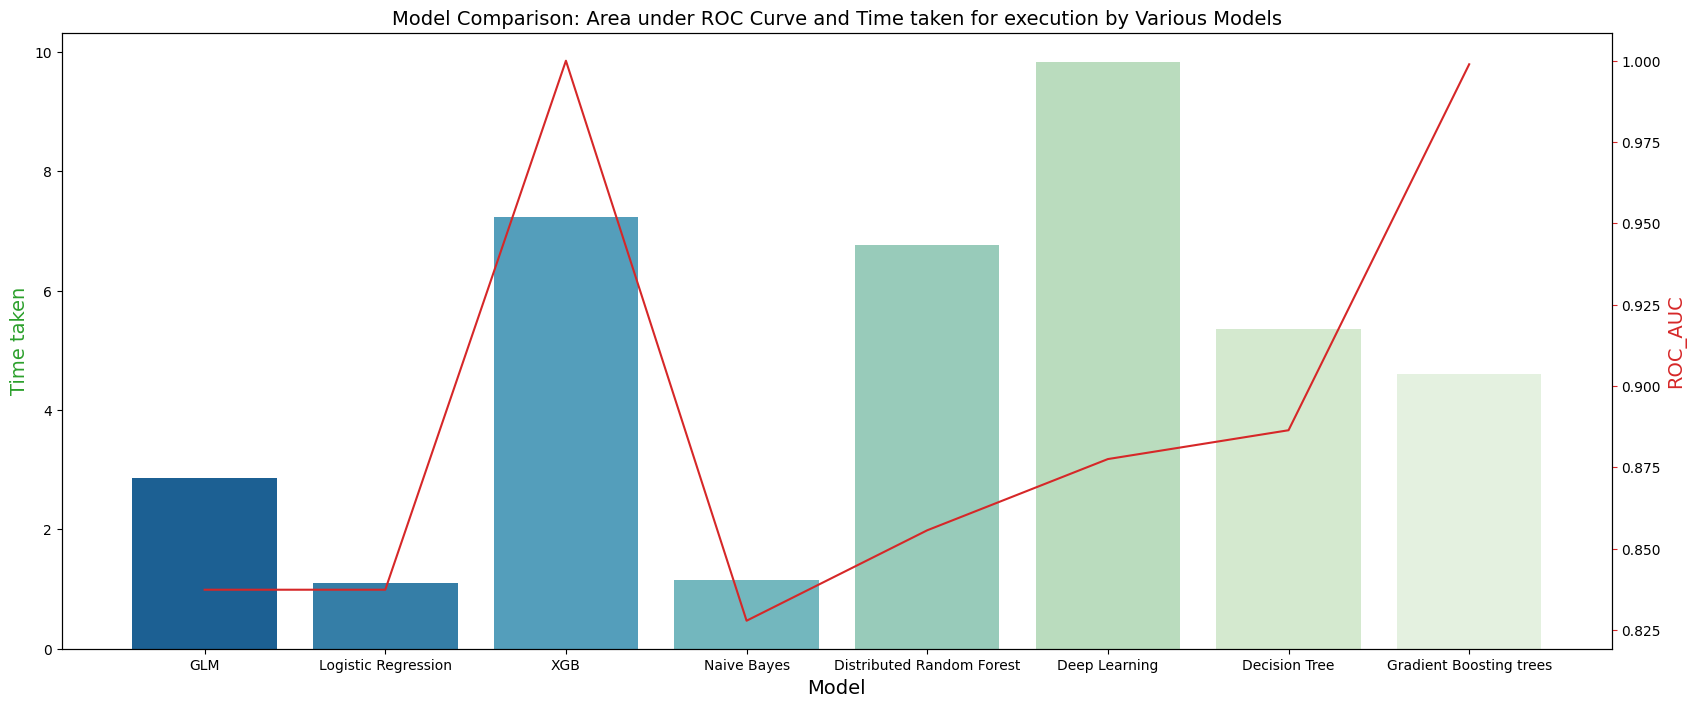

In [ ]:
roc_auc_scores = [roc_auc_glm, roc_auc_lr, roc_auc_xgb, roc_auc_NB, roc_auc_drf, roc_auc_dl, roc_auc_dt, roc_auc_gbt]
tt = [tt_glm, tt_lr, tt_xgb, tt_NB, tt_drf, tt_dl, tt_dt, tt_gbt]

model_data = {'Model': ['GLM','Logistic Regression','XGB','Naive Bayes','Distributed Random Forest', 'Deep Learning', 'Decision Tree', 'Gradient Boosting trees'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(20,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

Here gradient boosting trees is the best model as it gives AUC score closer to one and the time taken to implement this model is less than XGB. Therefore, we took Gradient boosting trees and tried to tune the hyperparameters to see whether it further improves it or not.

In the previous gradient boosted model, the hyperparameters were random. But the optimal parameters produced by rapidminer modelling were as shown in the image


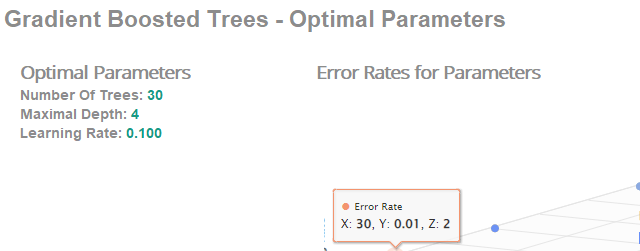

We have tried to use these optimal parameters to see whether it affects the performance in positive way or not.

In [ ]:
data = h2o.import_file("diabetes.csv")
from h2o.estimators import H2OGradientBoostingEstimator
gbt_model2 = H2OGradientBoostingEstimator(
    ntrees=30,
    learn_rate=0.1,
    max_depth=4,
    min_rows=10,
    sample_rate=0.8,
    col_sample_rate=0.8,
    seed=142
)
gbt_model2, roc_auc_gbt2, tt_gbt2 = run_model5(gbt_model2, data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ROC Area under Curve = 0.9456312368337983
Time taken = 2.765652894973755
Feature Importance:
                   variable  relative_importance  scaled_importance  \
0                   Glucose           283.178619           1.000000   
1                       BMI           102.846809           0.363187   
2                       Age            82.141960           0.290071   
3  DiabetesPedigreeFunction            54.920563           0.193943   
4               Pregnancies            37.636814           0.132908   
5                   Insulin            17.097326           0.060376   
6             BloodPressure            13.755662           0.048576   
7             SkinThickness            12.407922           0.043817   

   percentage  
0    0.468850  
1    0.170280  
2    0.136000  
3    0.090930

So lets compare it with the previous values

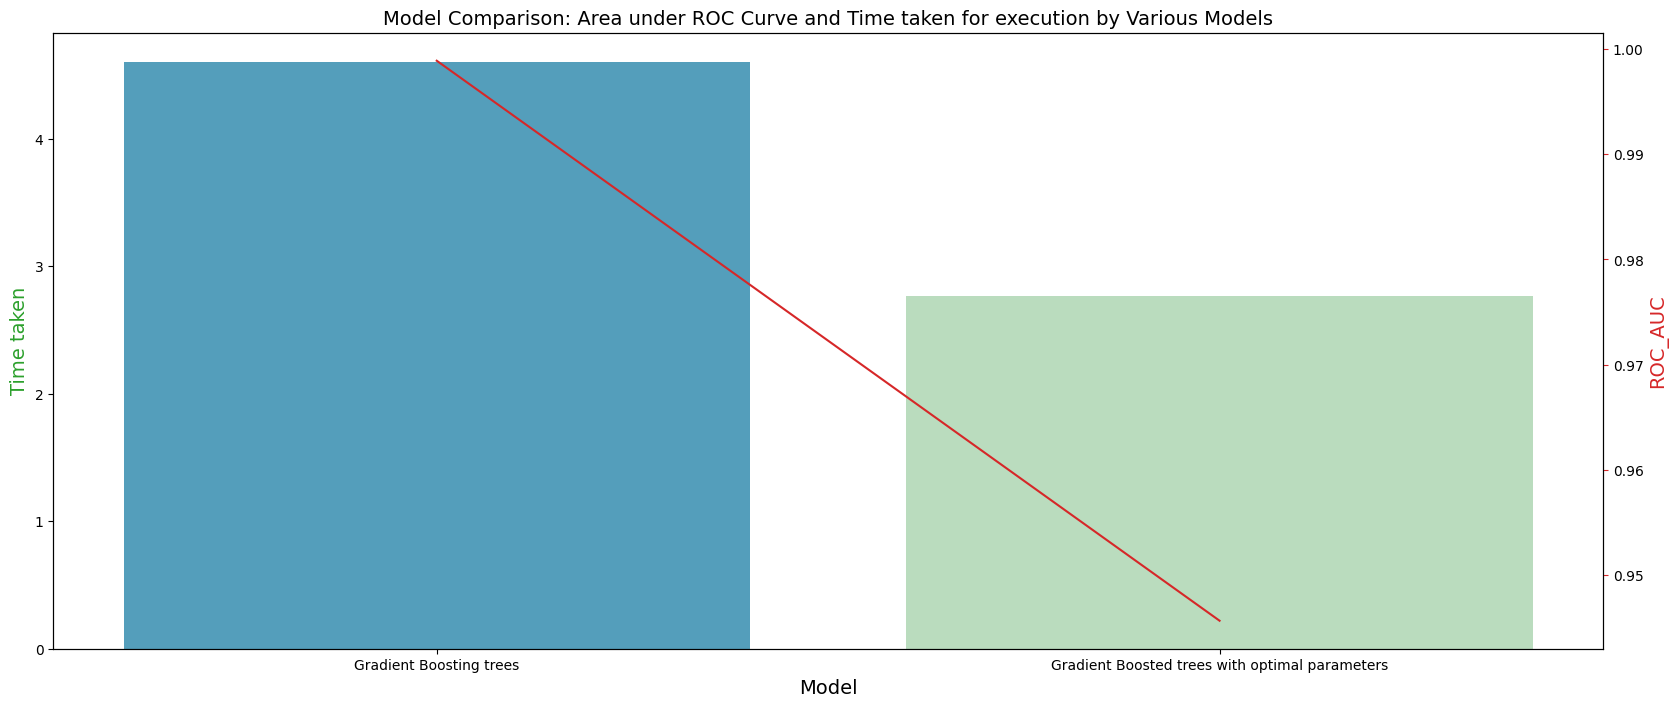

In [ ]:
roc_auc_scores = [roc_auc_gbt, roc_auc_gbt2]
tt = [tt_gbt, tt_gbt2]

model_data = {'Model': [ 'Gradient Boosting trees', 'Gradient Boosted trees with optimal parameters'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(20,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In our model, using optimal parameters from rapidminer reduced the time taken to complete the model, but it also compromised with AUC score which went down to 0.945 which was previously 0.9989